## TQQQ For The Long Term (Reddit Post Link) (Invest Copy)
This a backtest of the [TQQQ For The Long Term (Reddit Post Link) (Invest Copy)](https://app.composer.trade/symphony/BttvZpfGxQG8dvcdBxO6/details) using synthetically generated LETFs data that allows us to have valid and accurate simulated close prices, dating all the way back to the inception date of the corresponding unleveraged ETF they are based on. Real and simulated data are combined together to form a longer time-series.

In [1]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import plotly.express as px

In [2]:
# Import the LETFs data
data = pd.read_csv("./data/extended-leveraged-etfs.csv", index_col=0, parse_dates=True)
data

,SSO,UPRO,SPXL,SH,SDS,SPXS,QLD,TQQQ,PSQ,QID,...,TYO,UBT,TMF,TBF,TBT,TMV,UGL,GLL,UVXY,TLT
Date,,,,,,,,,,,,,,,,,,,,,
1986-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.69170,NaN,NaN,NaN,NaN,NaN,NaN,10.60539
1986-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.68715,NaN,NaN,NaN,NaN,NaN,NaN,10.58417
1986-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.70741,NaN,NaN,NaN,NaN,NaN,NaN,10.69021
1986-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.70279,NaN,NaN,NaN,NaN,NaN,NaN,10.66902
1986-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.70658,NaN,NaN,NaN,NaN,NaN,NaN,10.69021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12,39.42,27.97,52.77,17.30,54.48,29.31,35.26,18.10,15.14,28.14,...,13.84,24.81,8.06000,22.69,33.01,141.25999,47.6000,36.62,13.25000,100.35000
2022-10-13,41.49,30.14,56.85,16.85,51.63,27.04,36.86,19.31,14.79,26.89,...,14.03,24.32,7.85000,22.93,33.63,145.06000,46.9100,37.12,12.69000,99.39000
2022-10-14,39.60,28.08,52.98,17.23,53.93,28.87,34.62,17.57,15.25,28.51,...,14.20,23.97,7.67000,23.12,34.19,148.89000,45.7400,38.08,13.14000,98.57000


We now download the additional unleveraged ETFs required for this specific strategy backtest, and add them to the dataframe. It's possible to generate synthetic versions of these unleveraged ETFs too (there's already TLT in the data above, for example), but the results might be less accurate depending on what index you choose to generate the returns.

In [3]:
# Download the additional unleveraged ETFs required for this specific strategy backtest
unleveraged_etfs = yf.download(["SPY", "QQQ"])["Adj Close"]
unleveraged_etfs.index = unleveraged_etfs.index.tz_localize(None) # remove time info while keeping index type as datetime
# Add the unleveraged ETFs to the main dataframe
merged_df = pd.concat([data, unleveraged_etfs], axis=1)
merged_df

[*********************100%***********************]  2 of 2 completed


,SSO,UPRO,SPXL,SH,SDS,SPXS,QLD,TQQQ,PSQ,QID,...,TMF,TBF,TBT,TMV,UGL,GLL,UVXY,TLT,QQQ,SPY
Date,,,,,,,,,,,,,,,,,,,,,
1986-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.69170,NaN,NaN,NaN,NaN,NaN,NaN,10.60539,NaN,NaN
1986-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.68715,NaN,NaN,NaN,NaN,NaN,NaN,10.58417,NaN,NaN
1986-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.70741,NaN,NaN,NaN,NaN,NaN,NaN,10.69021,NaN,NaN
1986-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.70279,NaN,NaN,NaN,NaN,NaN,NaN,10.66902,NaN,NaN
1986-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.70658,NaN,NaN,NaN,NaN,NaN,NaN,10.69021,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481.269989,559.609985
2024-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.260010,558.700012
2024-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482.500000,560.619995


We now get a subset of this dataframe with only the tickers that are relevant for this particular strategy, and we do a sanity check to make sure there are no issues.

In [4]:
strategy_symbols = ["SPY", "TQQQ", "SPXL", "UVXY", "SQQQ", "TLT", "QQQ"]
strategy_data = merged_df[strategy_symbols].copy()
strategy_data

,SPY,TQQQ,SPXL,UVXY,SQQQ,TLT,QQQ
Date,,,,,,,
1986-05-19,NaN,NaN,NaN,NaN,NaN,10.60539,NaN
1986-05-20,NaN,NaN,NaN,NaN,NaN,10.58417,NaN
1986-05-21,NaN,NaN,NaN,NaN,NaN,10.69021,NaN
1986-05-22,NaN,NaN,NaN,NaN,NaN,10.66902,NaN
1986-05-23,NaN,NaN,NaN,NaN,NaN,10.69021,NaN
...,...,...,...,...,...,...,...
2024-08-19,559.609985,NaN,NaN,NaN,NaN,NaN,481.269989
2024-08-20,558.700012,NaN,NaN,NaN,NaN,NaN,480.260010
2024-08-21,560.619995,NaN,NaN,NaN,NaN,NaN,482.500000


In [5]:
strategy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9644 entries, 1986-05-19 to 2024-08-23
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     7949 non-null   float64
 1   TQQQ    5943 non-null   float64
 2   SPXL    8769 non-null   float64
 3   UVXY    8264 non-null   object 
 4   SQQQ    5943 non-null   float64
 5   TLT     9180 non-null   float64
 6   QQQ     6407 non-null   float64
dtypes: float64(6), object(1)
memory usage: 602.8+ KB


UVXY is currently of dtype object. Let's try to convert the column to float64, so we can use it in our calculations.

In [6]:
strategy_data["UVXY"] = strategy_data["UVXY"].astype("float64")
strategy_data["UVXY"].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 9644 entries, 1986-05-19 to 2024-08-23
Series name: UVXY
Non-Null Count  Dtype  
--------------  -----  
8264 non-null   float64
dtypes: float64(1)
memory usage: 150.7 KB


We now create the signals columns we need, using built-in pandas methods or `pandas-ta`.

In [7]:
# Signals
strategy_data["SPY_MA200"] = ta.sma(strategy_data["SPY"], length=200)
strategy_data["TQQQ_RSI10"] = ta.rsi(strategy_data["TQQQ"], length=10)
strategy_data["SPXL_RSI10"] = ta.rsi(strategy_data["SPXL"], length=10)
strategy_data["SPY_RSI10"] = ta.rsi(strategy_data["SPY"], length=10)
strategy_data["QQQ_RSI10"] = ta.rsi(strategy_data["QQQ"], length=10)
strategy_data["UVXY_RSI10"] = ta.rsi(strategy_data["UVXY"], length=10)
strategy_data["TQQQ_MA20"] = ta.sma(strategy_data["TQQQ"], length=20)
strategy_data["SQQQ_RSI10"] = ta.rsi(strategy_data["SQQQ"], length=10)
strategy_data["TLT_RSI10"] = ta.rsi(strategy_data["TLT"], length=10)
strategy_data["QQQ_5dgain"] = strategy_data["QQQ"].pct_change(5) * 100
strategy_data["TQQQ_1dgain"] = strategy_data["TQQQ"].pct_change(1) * 100
strategy_data["TQQQ_10dSTDreturn"] = strategy_data["TQQQ_1dgain"].rolling(10).std()

In [8]:
# Drop missing values so we start the backtest from the first day all signals and prices are available
strategy_data.dropna(inplace=True)

In [9]:
# Add "BUY" column in first position
strategy_data.insert(0, "BUY", pd.NA) # pd.NA is the new pandas native version of np.nan

In [10]:
strategy_data

,BUY,SPY,TQQQ,SPXL,UVXY,SQQQ,TLT,QQQ,SPY_MA200,TQQQ_RSI10,SPXL_RSI10,SPY_RSI10,QQQ_RSI10,UVXY_RSI10,TQQQ_MA20,SQQQ_RSI10,TLT_RSI10,QQQ_5dgain,TQQQ_1dgain,TQQQ_10dSTDreturn
Date,,,,,,,,,,,,,,,,,,,,
1999-04-07,NaN,84.708244,81.72095,45.31803,2.879196e+20,2.102258e+08,33.35910,46.857571,73.286319,61.265759,62.293455,63.046314,62.506441,31.463376,71.300601,36.733891,61.585289,3.345046,-3.161540,6.725346
1999-04-08,NaN,85.781807,83.63468,47.05327,2.817470e+20,2.053532e+08,33.66911,47.230106,73.366697,63.241224,67.303069,67.243551,64.283398,30.133641,72.093586,35.411436,68.707198,5.717742,2.341786,6.329253
1999-04-09,NaN,85.801659,85.15391,47.49072,2.644424e+20,2.016712e+08,33.57613,47.522781,73.443038,64.823658,68.476215,67.319815,65.702325,26.628145,72.914247,34.372423,64.709255,4.200669,1.816507,5.661916
1999-04-12,NaN,86.716118,83.40080,48.55757,2.655143e+20,2.058710e+08,33.63814,47.203461,73.519225,61.432813,71.269533,70.799469,62.683472,27.210950,73.899930,36.725352,66.168040,-0.112673,-2.058755,5.549664
1999-04-13,NaN,86.159515,79.98025,47.59537,2.781925e+20,2.143630e+08,33.42109,46.564884,73.593219,55.175798,65.457097,66.043695,56.876649,34.090945,74.441728,41.442027,57.003922,-1.657784,-4.101340,4.904016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12,NaN,347.412720,18.10000,52.77000,1.325000e+01,6.335000e+01,100.35000,259.478577,402.630789,29.380442,32.266999,33.369345,30.256256,65.041294,21.645000,68.684792,34.975614,-6.851563,-0.220507,6.327154
2022-10-13,NaN,356.581329,19.31000,56.85000,1.269000e+01,5.911000e+01,99.39000,265.563934,402.117104,37.938121,43.105232,45.241890,40.328400,57.202852,21.356000,57.165998,31.833812,-3.910528,6.685083,6.389549
2022-10-14,NaN,348.455353,17.57000,52.98000,1.314000e+01,6.438000e+01,98.57000,257.581787,401.559852,31.784061,36.884882,38.488388,33.316081,61.360555,21.004500,65.221002,29.333059,-3.106659,-9.010875,6.806726


### Generate asset allocation history
We create an empty dataframe that will be populated with our asset allocation history as we iterate over the strategy_data dataframe and calculate the strategy signal for each row (day). This allocation dataframe will later be passed to vectorbt.pro for backtesting.

In [11]:
strategy_allocations = pd.DataFrame(index=strategy_data.index, columns=["TQQQ", "SQQQ", "UVXY", "TLT"])
strategy_allocations

,TQQQ,SQQQ,UVXY,TLT
Date,,,,
1999-04-07,NaN,NaN,NaN,NaN
1999-04-08,NaN,NaN,NaN,NaN
1999-04-09,NaN,NaN,NaN,NaN
1999-04-12,NaN,NaN,NaN,NaN
1999-04-13,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-10-12,NaN,NaN,NaN,NaN
2022-10-13,NaN,NaN,NaN,NaN
2022-10-14,NaN,NaN,NaN,NaN


We now write our strategy logic and iterate over each row of the dataframe, finding the asset allocations for each row and putting them in the strategy_allocations dataframe (1 = 100% allocation, 0.5 = 50% etc.)

In [12]:
# TQQQ For The Long Term (Reddit Post Link) (Invest Copy)
# https://app.composer.trade/symphony/BttvZpfGxQG8dvcdBxO6/details

for row in strategy_data.index:
    if strategy_data.at[row, "SPY"] > strategy_data.at[row, "SPY_MA200"]:
        if strategy_data.at[row, "TQQQ_RSI10"] > 79:
            strategy_allocations.at[row, "UVXY"] = 1
        else:
            if strategy_data.at[row, "SPXL_RSI10"] > 80:
                strategy_allocations.at[row, "UVXY"] = 1
            else:
                strategy_allocations.at[row, "TQQQ"] = 1
    else:
        if strategy_data.at[row, "TQQQ_RSI10"] < 31:
            strategy_allocations.at[row, "TQQQ"] = 1
        else:
            if strategy_data.at[row, "SPY_RSI10"] < 30:
                strategy_allocations.at[row, "TQQQ"] = 1
            else:
                if strategy_data.at[row, "TQQQ"] < strategy_data.at[row, "TQQQ_MA20"]:
                    if strategy_data.at[row, "SQQQ_RSI10"] > strategy_data.at[row, "TLT_RSI10"]:
                        strategy_allocations.at[row, "SQQQ"] = 1
                    else:
                        strategy_allocations.at[row, "TLT"] = 1
                else:
                    if strategy_data.at[row, "SQQQ_RSI10"] < 31:
                        strategy_allocations.at[row, "SQQQ"] = 1
                    else:
                        strategy_allocations.at[row, "TQQQ"] = 1

In [13]:
# Replace NaN values with 0
strategy_allocations.fillna(0, inplace=True)

In [14]:
strategy_allocations

,TQQQ,SQQQ,UVXY,TLT
Date,,,,
1999-04-07,1,0,0,0
1999-04-08,1,0,0,0
1999-04-09,1,0,0,0
1999-04-12,1,0,0,0
1999-04-13,1,0,0,0
...,...,...,...,...
2022-10-12,1,0,0,0
2022-10-13,0,1,0,0
2022-10-14,0,1,0,0


#### Saving the data to .csv

In [15]:
# Save strategy_allocations to CSV for later use
strategy_allocations.to_csv("./data/strategy_allocations-08252024.csv")

We also save a dataframe with the close prices of the instruments used in our strategy allocation. This will be needed for backtesting in vectorbt.pro.

In [16]:
strategy_prices_tqqq     = strategy_data[["TQQQ"]]
strategy_prices_tqqq.to_csv("./data/strategy_prices_tqqq-08252024.csv")
strategy_prices_sqqq     = strategy_data[["SQQQ"]]
strategy_prices_sqqq.to_csv("./data/strategy_prices_sqqq-08252024.csv")
strategy_prices_uvxy     = strategy_data[["UVXY"]]
strategy_prices_uvxy.to_csv("./data/strategy_prices_uvxy-08252024.csv")
strategy_prices_tlt     = strategy_data[["TLT"]]
strategy_prices_tlt.to_csv("./data/strategy_prices_tlt-08252024.csv")

In [30]:
# Save the entire strategy data. This won't be needed later, but it's nice to have, just in case we want to reuse it somewhere.
strategy_data.to_csv("./data/strategy_data-08252024.csv")

### Backtesting the strategy
To run this backtest you'll need to have a valid subscription to [vectorbt.pro](https://vectorbt.pro).

#### Loading data into vectorbt.pro and preparing it for the backtest

First, we are loading the tickers close prices from the .csv file we saved earlier.

In [31]:
#pip install -U "/Users/ianliu/Documents/Code-icloud/yypt-quantconnect/vectorbt.pro[base]"

In [55]:
import vectorbtpro as vbt

vbt_prices = vbt.CSVData.fetch("./data/strategy_prices.csv", index_col=0) # same syntax you would use with pd.read_csv

In [33]:
tqqq = pd.read_csv("./data/strategy_prices_tqqq.csv", index_col=0, parse_dates=True)
sqqq = pd.read_csv("./data/strategy_prices_sqqq.csv", index_col=0, parse_dates=True)
uvxy = pd.read_csv("./data/strategy_prices_uvxy.csv", index_col=0, parse_dates=True)
tlt = pd.read_csv("./data/strategy_prices_tlt.csv", index_col=0, parse_dates=True)

In [46]:
import vectorbtpro as vbt
vbt_prices = vbt.Data.from_data({"TQQQ": tqqq, "SQQQ": sqqq, "UVXY": uvxy, "TLT": tlt})

In [47]:
vbt_prices.data

symbol_dict({'TQQQ':                               Close
Date                               
1999-04-07 00:00:00+00:00  81.72095
1999-04-08 00:00:00+00:00  83.63468
1999-04-09 00:00:00+00:00  85.15391
1999-04-12 00:00:00+00:00  83.40080
1999-04-13 00:00:00+00:00  79.98025
...                             ...
2022-10-12 00:00:00+00:00  18.10000
2022-10-13 00:00:00+00:00  19.31000
2022-10-14 00:00:00+00:00  17.57000
2022-10-17 00:00:00+00:00  19.30000
2022-10-18 00:00:00+00:00  19.78000

[5924 rows x 1 columns], 'SQQQ':                                   Close
Date                                   
1999-04-07 00:00:00+00:00  2.102258e+08
1999-04-08 00:00:00+00:00  2.053532e+08
1999-04-09 00:00:00+00:00  2.016712e+08
1999-04-12 00:00:00+00:00  2.058710e+08
1999-04-13 00:00:00+00:00  2.143630e+08
...                                 ...
2022-10-12 00:00:00+00:00  6.335000e+01
2022-10-13 00:00:00+00:00  5.911000e+01
2022-10-14 00:00:00+00:00  6.438000e+01
2022-10-17 00:00:00+00:00  5.800000e+

We now generate a dataframe in a format compatible with vectorbt.pro, which will be populated with our allocation weights later.

In [48]:
print(vbt_prices.data.keys())

dict_keys(['TQQQ', 'SQQQ', 'UVXY', 'TLT'])


In [49]:
symbol_wrapper = vbt_prices.get_symbol_wrapper(symbols=["TQQQ", "SQQQ", "UVXY", "TLT"], freq='1d') # the order of symbols= should match the order of columns in strategy_allocations

self.symbols: ['TQQQ', 'SQQQ', 'UVXY', 'TLT']
symbol: TQQQ
self.symbols: ['TQQQ', 'SQQQ', 'UVXY', 'TLT']
symbol: SQQQ
self.symbols: ['TQQQ', 'SQQQ', 'UVXY', 'TLT']
symbol: UVXY
self.symbols: ['TQQQ', 'SQQQ', 'UVXY', 'TLT']
symbol: TLT


In [50]:
print(symbol_wrapper.shape)
print(strategy_allocations.shape)

(5924, 4)
(5924, 4)


The wrapper should have the same number of rows and columns as the data we have loaded. Now we can fill symbol_wrapper with data from our allocations dataframe.

In [51]:
tickers_allocations = vbt.PortfolioOptimizer.from_allocations(symbol_wrapper, strategy_allocations)
allocations = tickers_allocations.allocations # can also type tickers_allocations.get_allocations()
allocations

symbol,TQQQ,SQQQ,UVXY,TLT
Date,,,,
1999-04-07 00:00:00+00:00,1.0,0.0,0.0,0.0
1999-04-08 00:00:00+00:00,1.0,0.0,0.0,0.0
1999-04-09 00:00:00+00:00,1.0,0.0,0.0,0.0
1999-04-12 00:00:00+00:00,1.0,0.0,0.0,0.0
1999-04-13 00:00:00+00:00,1.0,0.0,0.0,0.0
...,...,...,...,...
2022-10-12 00:00:00+00:00,1.0,0.0,0.0,0.0
2022-10-13 00:00:00+00:00,0.0,1.0,0.0,0.0
2022-10-14 00:00:00+00:00,0.0,1.0,0.0,0.0


Now we get a dataframe with the close prices from the data we have loaded.

In [56]:
close_prices = vbt_prices.get()
close_prices

self.symbols: ['strategy_prices']
symbol: strategy_prices


,TQQQ,SQQQ,UVXY,TLT
Date,,,,
1999-04-07 00:00:00+00:00,81.72095,2.102258e+08,2.879196e+20,33.35910
1999-04-08 00:00:00+00:00,83.63468,2.053532e+08,2.817470e+20,33.66911
1999-04-09 00:00:00+00:00,85.15391,2.016712e+08,2.644424e+20,33.57613
1999-04-12 00:00:00+00:00,83.40080,2.058710e+08,2.655143e+20,33.63814
1999-04-13 00:00:00+00:00,79.98025,2.143630e+08,2.781925e+20,33.42109
...,...,...,...,...
2022-10-12 00:00:00+00:00,18.10000,6.335000e+01,1.325000e+01,100.35000
2022-10-13 00:00:00+00:00,19.31000,5.911000e+01,1.269000e+01,99.39000
2022-10-14 00:00:00+00:00,17.57000,6.438000e+01,1.314000e+01,98.57000


#### Running the backtest

We now have everything that is needed to run our backtest: a dataframe with the close prices and one with the target allocations, both in a valid format recognized by vectorbt.pro . We can proceed with running the backtest and showing the results.

In [57]:
portfolio = vbt.Portfolio.from_orders(
    
    close=close_prices,
    #bm_close=put_your_benchmark_close_prices_here,
    size=allocations, # Here we pass the allocations we calculated earlier
    size_type="targetpercent",
    group_by=True,  
    cash_sharing=True,
    call_seq="auto",
    freq='D', # needed to calculate annualized returns and some metrics like sharpe, sortino etc in portfolio.stats()
    fees=0, # can specify a transaction fee
    )

Read the documentation of `Portfolio.from_orders()` for more info. It's possible compare the performance to a benchmark if you pass the desired benchmark strategy/ticker time series to #bm_close . Beware that the close_prices dataframe and the benchmark you are providing must have the same index for accurate comparisons. 

#### Analyze backtest performance

In this notebook we will show just the tip of the iceberg of what's possible with vectorbt.pro . Read the [documentation](https://vectorbt.pro/getting-started/#private-sessions) for more ideas and metrics.

In [58]:
# This is the most basic overview of the portfolio metrics
portfolio.stats()

Start Index                    1999-04-07 00:00:00+00:00
End Index                      2022-10-18 00:00:00+00:00
Total Duration                        5924 days 00:00:00
Start Value                                        100.0
Min Value                                      69.263696
Max Value                              4687220545.261032
End Value                              4120065403.173685
Total Return [%]                       4120065303.173685
Benchmark Return [%]                           -20.26587
Position Coverage [%]                          99.561107
Max Gross Exposure [%]                             100.0
Max Drawdown [%]                               84.671195
Max Drawdown Duration                  673 days 00:00:00
Total Orders                                        1604
Total Fees Paid                                      0.0
Total Trades                                         807
Win Rate [%]                                   58.188586
Best Trade [%]                 

#### Returns

We can go even further than that and do in-depth analysis of returns and other metrics.

In [59]:
portfolio.returns_stats()

Start Index                  1999-04-07 00:00:00+00:00
End Index                    2022-10-18 00:00:00+00:00
Total Duration                      5924 days 00:00:00
Total Return [%]                     4120065303.173654
Benchmark Return [%]                         -20.26587
Annualized Return [%]                       194.566249
Annualized Volatility [%]                     93.26795
Max Drawdown [%]                             84.671195
Max Drawdown Duration                673 days 00:00:00
Sharpe Ratio                                  1.616527
Calmar Ratio                                  2.297904
Omega Ratio                                   1.299548
Sortino Ratio                                 2.564612
Skew                                          0.914392
Kurtosis                                      9.964083
Tail Ratio                                    1.071239
Common Sense Ratio                            1.392126
Value at Risk                                -0.072557
Alpha     

##### Annual Returns

We can see the annual returns of the strategy, and the advantage of having the output in a simple pandas series is that we can then manipulate and display this data however we want to analyze it in different ways, for example by making a bar plot of the annual returns, in this specific case. 

In [60]:
# Annual returns
annual_returns = portfolio.annual_returns # can also type portfolio.get_annual_returns()
annual_returns

Date
1999-04-07 00:00:00+00:00     2.024719
2000-04-06 00:00:00+00:00    -0.127536
2001-04-06 00:00:00+00:00    -0.295726
2002-04-06 00:00:00+00:00     0.680320
2003-04-06 00:00:00+00:00     1.105061
2004-04-05 00:00:00+00:00    -0.233134
2005-04-05 00:00:00+00:00     0.356911
2006-04-05 00:00:00+00:00    -0.166240
2007-04-05 00:00:00+00:00     0.510048
2008-04-04 00:00:00+00:00     2.966231
2009-04-04 00:00:00+00:00     1.672573
2010-04-04 00:00:00+00:00     0.683610
2011-04-04 00:00:00+00:00     0.568304
2012-04-03 00:00:00+00:00     0.163655
2013-04-03 00:00:00+00:00     1.395278
2014-04-03 00:00:00+00:00     0.784987
2015-04-03 00:00:00+00:00     0.918025
2016-04-02 00:00:00+00:00     0.955297
2017-04-02 00:00:00+00:00     1.814542
2018-04-02 00:00:00+00:00     1.267156
2019-04-02 00:00:00+00:00     7.409540
2020-04-01 00:00:00+00:00    10.763717
2021-04-01 00:00:00+00:00     1.425993
2022-04-01 00:00:00+00:00     4.981548
Freq: 365D, Name: group, dtype: float64

In [61]:
# Make an bar plot of the annual returns
annual_returns_plot = px.bar(annual_returns, x=annual_returns.index, y=annual_returns.values, labels={"x":"Year", "y":"Portfolio Return"}, title="Annual Returns")
annual_returns_plot.show()

#### Plots

Vectorbt.pro also has *a lot* of already built-in interactive plots that can be generated very easily. Below we'll plot all the available plots just for reference

In [63]:
# Let's plot all the possible subplots just for reference. By default there's only the return curve.
portfolio.plot(settings=dict(bm_returns=True, yaxis_kwargs=dict(type="log")), subplots="all")

/Users/ianliu/opt/miniconda3/envs/py310/lib/python3.10/site-packages/vectorbtpro/generic/plots_builder.py:394: UserWarning:

Subplot 'orders' does not support grouped data

/Users/ianliu/opt/miniconda3/envs/py310/lib/python3.10/site-packages/vectorbtpro/generic/plots_builder.py:394: UserWarning:

Subplot 'trades' does not support grouped data

/Users/ianliu/opt/miniconda3/envs/py310/lib/python3.10/site-packages/vectorbtpro/generic/plots_builder.py:394: UserWarning:

Subplot 'trade_pnl' does not support grouped data

/Users/ianliu/opt/miniconda3/envs/py310/lib/python3.10/site-packages/vectorbtpro/generic/plots_builder.py:394: UserWarning:

Subplot 'trade_signals' does not support grouped data

/Users/ianliu/opt/miniconda3/envs/py310/lib/python3.10/site-packages/vectorbtpro/generic/plots_builder.py:394: UserWarning:

Subplot 'asset_flow' does not support grouped data

/Users/ianliu/opt/miniconda3/envs/py310/lib/python3.10/site-packages/vectorbtpro/generic/plots_builder.py:394: UserWarnin

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#2ca02c', 'shape': 'hv'},
              'mode': 'lines',
              'name': 'Cash',
              'showlegend': True,
              'type': 'scatter',
              'uid': '2c6aae74-6f16-41ff-b8e4-24d689387b2d',
              'x': array([datetime.datetime(1999, 4, 7, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(1999, 4, 8, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(1999, 4, 9, 0, 0, tzinfo=<UTC>), ...,
                          datetime.datetime(2022, 10, 14, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 10, 17, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 10, 18, 0, 0, tzinfo=<UTC>)], dtype=object),
              'xaxis': 'x',
              'y': array([-100.,    0.,    0., ...,    0.,    0.,    0.]),
              'yaxis': 'y'},
             {'hoverinfo': 'skip',
              'line': {'color': 'rgba(0, 0, 0, 

It's also possible to specify custom subplots. The example below would create a cumulative returns and rolling drawdown plot. You can set the settings across all the subplots by using the global template mapping by adding `template_context=dict(window=10)` for example.

In [64]:
# subplots = [
#     ('cumulative_returns', dict(
#         title='Cumulative Returns',
#         yaxis_kwargs=dict(title='Cumulative returns'),
#         plot_func='cumulative_returns.vbt.plot',
#         select_col_cumulative_returns=True,
#         pass_add_trace_kwargs=True
#     )),
#     ('rolling_drawdown', dict(
#         title='Rolling Drawdown',
#         yaxis_kwargs=dict(title='Rolling drawdown'),
#         plot_func=[
#             'returns_acc',  # returns accessor
#             (
#                 'rolling_max_drawdown',  # function name
#                 (vbt.Rep('window'),)),  # positional arguments
#             'vbt.plot'  # plotting function
#         ],
#         select_col_returns_acc=True,
#         pass_add_trace_kwargs=True,
#         trace_names=[vbt.Sub('rolling_drawdown(${window})')],  # add window to the trace name
#     ))
# ]

# portfolio.plot(subplots, template_context=dict(window=10))


#### Drawdowns

Like the returns, drawdowns can also be analyzed extensively.

In [65]:
portfolio.get_drawdowns().stats()

Start Index                     1999-04-07 00:00:00+00:00
End Index                       2022-10-18 00:00:00+00:00
Total Duration                         5924 days 00:00:00
Coverage [%]                                    92.403781
Total Records                                         312
Total Recovered Drawdowns                             311
Total Active Drawdowns                                  1
Active Drawdown [%]                             12.100031
Active Duration                           3 days 00:00:00
Active Recovery [%]                                   0.0
Active Recovery Return [%]                            0.0
Active Recovery Duration                  0 days 00:00:00
Max Drawdown [%]                                84.671195
Avg Drawdown [%]                                 8.431798
Max Drawdown Duration                   673 days 00:00:00
Avg Drawdown Duration          17 days 14:11:57.684887459
Max Recovery Return [%]                         556.72515
Avg Recovery R

In [68]:
portfolio.get_drawdowns().plot()

FigureWidget({
    'data': [{'line': {'color': '#1f77b4'},
              'mode': 'lines',
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'b9c77cbc-7c2d-4f4a-97f3-a716afcda8ab',
              'x': array([datetime.datetime(1999, 4, 7, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(1999, 4, 8, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(1999, 4, 9, 0, 0, tzinfo=<UTC>), ...,
                          datetime.datetime(2022, 10, 14, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 10, 17, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 10, 18, 0, 0, tzinfo=<UTC>)], dtype=object),
              'y': array([1.00000000e+02, 1.02341786e+02, 1.04200832e+02, ..., 4.68722055e+09,
                          4.22272121e+09, 4.12006540e+09])},
             {'customdata': array([['21', '2000-03-27 00:00:00+00:00', 506.58518906682025],
              

In [69]:
portfolio.plot_underwater()

FigureWidget({
    'data': [{'fill': 'tozeroy',
              'fillcolor': 'rgba(220,57,18,0.3000)',
              'line': {'color': '#dc3912'},
              'mode': 'lines',
              'name': 'Drawdown',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'aee16aa6-f6c0-4827-9c55-c02024f2bfba',
              'x': array([datetime.datetime(1999, 4, 7, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(1999, 4, 8, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(1999, 4, 9, 0, 0, tzinfo=<UTC>), ...,
                          datetime.datetime(2022, 10, 14, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 10, 17, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 10, 18, 0, 0, tzinfo=<UTC>)], dtype=object),
              'y': array([ 0.        ,  0.        ,  0.        , ...,  0.        , -0.0990991 ,
                          -0.12100031])}],
    'layout': {'height': 350,
    

In [70]:
drawdown_df = portfolio.get_drawdowns().records_readable
drawdown_df

,Drawdown Id,Column,Start Index,Valley Index,End Index,Start Value,Valley Value,End Value,Status
0,0,group,1999-04-09 00:00:00+00:00,1999-04-19 00:00:00+00:00,1999-04-26 00:00:00+00:00,1.042008e+02,7.151953e+01,1.051608e+02,Recovered
1,1,group,1999-04-26 00:00:00+00:00,1999-05-25 00:00:00+00:00,1999-07-02 00:00:00+00:00,1.051608e+02,6.926370e+01,1.083871e+02,Recovered
2,2,group,1999-07-02 00:00:00+00:00,1999-07-06 00:00:00+00:00,1999-07-08 00:00:00+00:00,1.083871e+02,1.062620e+02,1.109566e+02,Recovered
3,3,group,1999-07-09 00:00:00+00:00,1999-07-13 00:00:00+00:00,1999-07-14 00:00:00+00:00,1.142421e+02,1.107571e+02,1.163586e+02,Recovered
4,4,group,1999-07-16 00:00:00+00:00,1999-08-10 00:00:00+00:00,1999-09-03 00:00:00+00:00,1.227807e+02,8.220110e+01,1.236605e+02,Recovered
...,...,...,...,...,...,...,...,...,...
307,307,group,2022-09-21 00:00:00+00:00,2022-09-26 00:00:00+00:00,2022-09-29 00:00:00+00:00,3.464776e+09,3.133803e+09,3.596636e+09,Recovered
308,308,group,2022-09-29 00:00:00+00:00,2022-09-30 00:00:00+00:00,2022-10-03 00:00:00+00:00,3.596636e+09,3.407896e+09,3.644261e+09,Recovered
309,309,group,2022-10-03 00:00:00+00:00,2022-10-05 00:00:00+00:00,2022-10-07 00:00:00+00:00,3.644261e+09,3.301393e+09,3.778594e+09,Recovered
310,310,group,2022-10-11 00:00:00+00:00,2022-10-12 00:00:00+00:00,2022-10-13 00:00:00+00:00,4.042783e+09,4.033868e+09,4.303535e+09,Recovered


As another example of how it's possible to play with the data, let's create a dataframe that sorts the percentage drawdowns from biggest to smallest and shows the drawdown start and recovery date.

In [71]:
drawdown_df["Drawdown PCT"] = ((drawdown_df["Peak Value"]-drawdown_df["Valley Value"])/drawdown_df["Peak Value"])*100
biggest_drawdowns = drawdown_df[["Peak Index", "Valley Index", "Drawdown PCT"]].sort_values(by=["Drawdown PCT"], ascending=False)
biggest_drawdowns["Peak Index"] = biggest_drawdowns["Peak Index"].dt.tz_localize(None)
biggest_drawdowns["Valley Index"] = biggest_drawdowns["Valley Index"].dt.tz_localize(None)
biggest_drawdowns

KeyError: 'Peak Value'

#### Analysis per single asset inside the portfolio

With `group_by=False` it's possible analize the contribution to returns, drawdowns and all the other metrics for each single ticker in the portfolio separately from the others, for really in-depth analysis of what's contributing to the performance of the portfolio.

In [72]:
portfolio_not_grouped = vbt.Portfolio.from_orders(
    
    close=close_prices,
    #bm_close=put_your_benchmark_close_prices_here,
    size=allocations, # Here we pass the allocations we calculated earlier
    size_type="targetpercent",
    group_by=False,  
    cash_sharing=True,
    call_seq="auto",
    freq='D', # needed to calculate annualized returns and some metrics like sharpe, sortino etc in portfolio.stats()
    fees=0, # can specify a transaction fee here
    )

We can get a dataframe with all the stats for each single asset

In [73]:
single_asset_stats = portfolio_not_grouped.stats(agg_func=None)
single_asset_stats

,,Start Index,End Index,Total Duration,Start Value,Min Value,Max Value,End Value,Total Return [%],Benchmark Return [%],Position Coverage [%],...,Avg Winning Trade [%],Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio
,symbol,,,,,,,,,,,,,,,,,,,,,
TQQQ,TQQQ,1999-04-07 00:00:00+00:00,2022-10-18 00:00:00+00:00,5924 days,100.0,49.828882,2.088837e+06,1.806728e+06,1.806628e+06,-75.795680,82.157326,...,14.303035,-8.715337,19 days 21:31:45.882352941,15 days 18:05:22.388059701,2.464268,5251.825239,1.144562,0.898147,1.219033,1.731370
SQQQ,SQQQ,1999-04-07 00:00:00+00:00,2022-10-18 00:00:00+00:00,5924 days,100.0,76.851893,5.542402e+03,4.871770e+03,4.771770e+03,-99.999973,6.735314,...,10.414584,-6.800371,2 days 08:42:11.868131868,2 days 16:28:39.402985074,4.593626,31.574137,0.825748,0.488567,1.577388,1.459872
UVXY,UVXY,1999-04-07 00:00:00+00:00,2022-10-18 00:00:00+00:00,5924 days,100.0,95.815675,2.918772e+03,2.918772e+03,2.818772e+03,-100.000000,3.038488,...,9.915022,-4.340851,2 days 15:00:00,2 days 12:34:17.142857142,17.314726,40.268167,0.916269,0.665725,2.526262,2.338571
TLT,TLT,1999-04-07 00:00:00+00:00,2022-10-18 00:00:00+00:00,5924 days,100.0,96.865816,1.430247e+02,1.331103e+02,3.311026e+01,194.732172,7.478055,...,1.508409,-1.084195,3 days 17:11:21.081081081,2 days 04:12:58.378378378,1.330448,0.217831,0.382517,0.140920,1.229446,0.587827


In [74]:
# Alternative way to grab the stats for a specific asset, in this case SQQQ
portfolio_not_grouped.stats(group_by=False, column=2)

Start Index                   1999-04-07 00:00:00+00:00
End Index                     2022-10-18 00:00:00+00:00
Total Duration                       5924 days 00:00:00
Start Value                                       100.0
Min Value                                     95.815675
Max Value                                   2918.771676
End Value                                   2918.771676
Total Return [%]                            2818.771676
Benchmark Return [%]                             -100.0
Position Coverage [%]                          3.038488
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              34.706887
Max Drawdown Duration                 324 days 00:00:00
Total Orders                                        140
Total Fees Paid                                     0.0
Total Trades                                         70
Win Rate [%]                                  68.571429
Best Trade [%]                                65

We can get even more detailed returns stats for each single asset, and then potentially analyzing or plotting them in many different ways.

In [75]:
# Even more detailed returns stats for each single asset
single_asset_returns = portfolio_not_grouped.returns_stats(agg_func=None)
single_asset_returns

,,Start Index,End Index,Total Duration,Total Return [%],Benchmark Return [%],Annualized Return [%],Annualized Volatility [%],Max Drawdown [%],Max Drawdown Duration,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,Skew,Kurtosis,Tail Ratio,Common Sense Ratio,Value at Risk,Alpha,Beta
,symbol,,,,,,,,,,,,,,,,,,,,
TQQQ,TQQQ,1999-04-07 00:00:00+00:00,2022-10-18 00:00:00+00:00,5924 days,1.806628e+06,-75.795680,82.929282,81.479921,92.333707,2341 days,1.144562,0.898147,1.219033,1.731370,0.712173,11.802824,0.959728,1.16994,-0.06625,0.928236,0.668754
SQQQ,SQQQ,1999-04-07 00:00:00+00:00,2022-10-18 00:00:00+00:00,5924 days,4.771770e+03,-99.999973,27.052949,37.028826,55.372027,2382 days,0.825748,0.488567,1.577388,1.459872,3.434891,66.091816,NaN,NaN,0.00000,0.438752,0.138230
UVXY,UVXY,1999-04-07 00:00:00+00:00,2022-10-18 00:00:00+00:00,5924 days,2.818772e+03,-100.000000,23.105232,25.961340,34.706887,324 days,0.916269,0.665725,2.526262,2.338571,15.822559,465.990769,NaN,NaN,0.00000,0.284622,0.013518
TLT,TLT,1999-04-07 00:00:00+00:00,2022-10-18 00:00:00+00:00,5924 days,3.311026e+01,194.732172,1.777819,4.922559,12.615769,2808 days,0.382517,0.140920,1.229446,0.587827,2.144185,86.583990,NaN,NaN,0.00000,0.011623,0.091047


<AxesSubplot: xlabel='Date'>

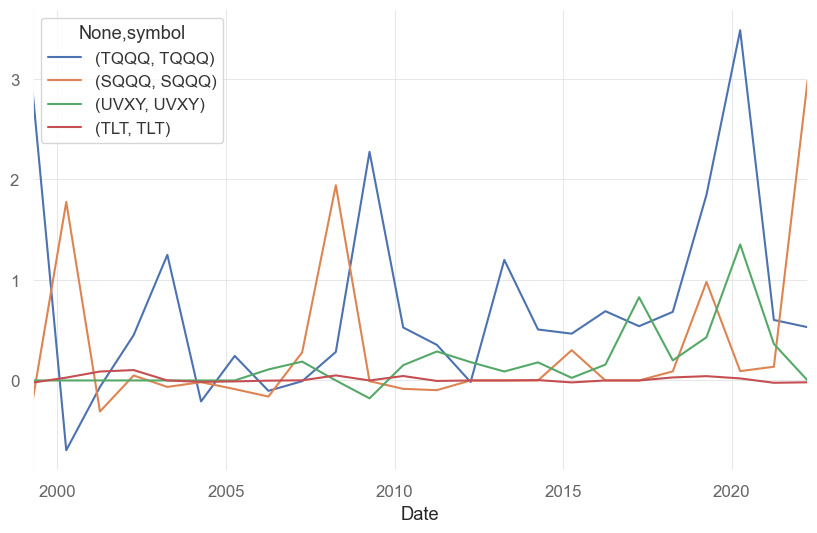

In [76]:
single_asset_annual_returns = portfolio_not_grouped.get_annual_returns()
single_asset_annual_returns.plot()
# It's also possible to do a yearly bar chart with this data

Remember the huge number of plots we generated earlier? There's the ability to do the same thing for each of the assets in the portfolioto plot a single asset of the portfolio with orders, trade pnl and returns. It's possible to specify additional subplots. Let's try see all the possibilities.

In [77]:
# We plot all the available plots for column 3 aka TLT
portfolio_not_grouped.plot(column=3, subplots="all") # we're plotting all the possible subplots just for reference

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'mode': 'lines',
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'c6c8b794-9d93-4e32-b2ce-57068fa3a7c1',
              'x': array([datetime.datetime(1999, 4, 7, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(1999, 4, 8, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(1999, 4, 9, 0, 0, tzinfo=<UTC>), ...,
                          datetime.datetime(2022, 10, 14, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 10, 17, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 10, 18, 0, 0, tzinfo=<UTC>)], dtype=object),
              'xaxis': 'x',
              'y': array([33.3591 , 33.66911, 33.57613, ..., 98.57   , 98.09   , 98.32   ]),
              'yaxis': 'y'},
             {'customdata': array([['0', '1999-09-23 00:00:00+00:00', 3.124292

There is really so much more that can be done, once you get familiar with how things work. Feel free to contact me on discord ( **Raekon#7854** ) if you need any help running this demo